In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [14]:
import generate_tools.kinetic_monte_carlo as kmc

n_species = 3
n_boxes = 1
rate_1 = 1.
rate_2 = 12.
diffusivity_a = np.array([[0.]])
diffusivity_b = np.array([[0.]])
diffusivity_c = np.array([[0.]])
diffusivity = np.array([diffusivity_a, diffusivity_b, diffusivity_c])
init_state = np.array([[50, 50, 0]])
species_names = ["A", "B", "C"]
system = kmc.ReactionDiffusionSystem(diffusivity, 3, 1, init_state, species_names=species_names)
system.add_fusion("A", "B", "C", np.array([rate_1]))
system.add_fission("C", "A", "B", np.array([rate_2]))
system.simulate(1000)

[KMC] [2017-07-02 16:00:18] [INFO] Simulate for 1000 steps


In [21]:
def get_counts_config(n_frames, single_box=True, convert_to_float=True):
    counts, times = system.convert_events_to_time_series(n_frames=n_frames)
    if single_box:
        counts = np.sum(counts, axis=1)

    if convert_to_float:
        counts = np.array(counts, dtype=np.float64)
    
    config = system.get_trajectory_config()
    return counts, times, config

counts_full, times_full, config = get_counts_config(20000)

# cut initial state
counts_equ = np.split(counts_full, 40)[-1]
times_equ = np.split(times_full, 40)[-1]
counts_init = np.split(counts_full, 2)[0]
times_init = np.split(times_full, 2)[0]

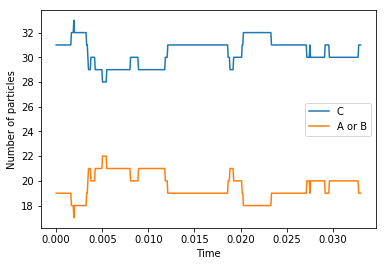

In [23]:
def plot_counts(counts, times, config):
    plt.plot(times, counts[:, config.types["C"]], label="C")
    plt.plot(times, counts[:, config.types["A"]], label=r"A or B")
    plt.legend(loc="best")
    plt.xlabel("Time")
    plt.ylabel("Number of particles")

plot_counts(counts_equ, times_equ-times_equ[0], config)
plt.savefig("example_data_few_equ.pdf")